<a href="https://colab.research.google.com/github/tarikdahnoun/Particle-Tracking-System/blob/master/PY_599_FINAL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import LSTM
from keras.layers import Dense

# Inspiration drawn from these sources:
# http://cs229.stanford.edu/proj2016/report/IterKuckZhuang-TargetTrackingwithKalmanFilteringKNNandLSTMs-report.pdf
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

Using TensorFlow backend.


## Random Walk

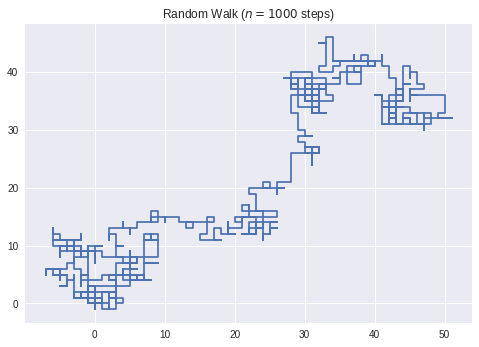

In [0]:
# Source: https://www.geeksforgeeks.org/random-walk-implementation-python/

# Python code for 2D random walk. 
import numpy 
import pylab 
import random 
  
# defining the number of steps 
n = 1000
  
#creating two array for containing x and y coordinate 
#of size equals to the number of size and filled up with 0's 
x = numpy.zeros(n) 
y = numpy.zeros(n) 
  
# filling the coordinates with random variables 
for i in range(1, n): 
    val = random.randint(1, 4) 
    if val == 1: 
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1] 
    elif val == 2: 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif val == 3: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1
      
  
# plotting stuff: 
pylab.title("Random Walk ($n = " + str(n) + "$ steps)") 
pylab.plot(x, y) 
#pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600) 
pylab.show()

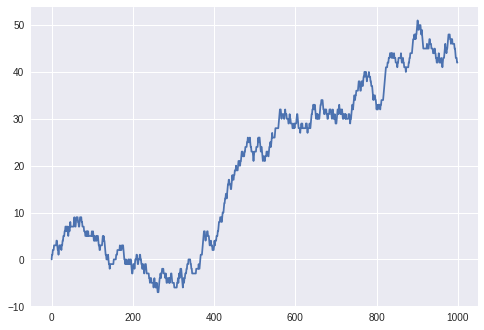

In [0]:
t = np.arange(0.0, n)

plt.plot(t,x)

In [0]:
import numpy as np
from random import uniform
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

x_val = x
x_val = x_val.reshape(-1, 1)


# Scale the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_val)
x_train_scaled=scaler.transform(x_val)



print(x_train_scaled.shape)

# Create a window of data 
lb=5
dataX, dataY = [], []
for i in range(len(x_train_scaled)-lb-1):
		  a = x_train_scaled[i:(i+lb), 0]
		  dataX.append(a)
		  dataY.append(x_train_scaled[i + lb, 0])
x_train_scaled, y_train_scaled = np.array(dataX), np.array(dataY)

# Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(x_train_scaled, y_train_scaled, train_size=0.6, shuffle = False)



# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1000, 1)
(596, 5, 1)
(596,)
(398, 5, 1)
(398,)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
model_rw = Sequential()
model_rw.add(LSTM(64, input_shape=(lb,1)))
model_rw.add(Dense(1))

model_rw.compile(optimizer='adam', loss='mse', metrics=['mse'])

model_rw.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_rw = model_rw.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=1, validation_split=0.2)

Train on 476 samples, validate on 120 samples
Epoch 1/50
476/476 [==============================] - 3s 6ms/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 2/50
476/476 [==============================] - 2s 5ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 3/50
476/476 [==============================] - 2s 5ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/50
476/476 [==============================] - 2s 5ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5/50
476/476 [==============================] - 2s 5ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6/50
476/476 [==============================] - 2s 5ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0039 - val_mean_squa

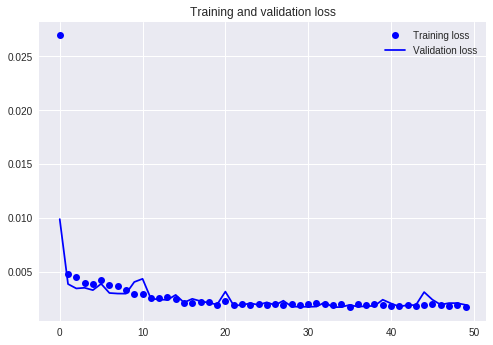

In [0]:
acc = history_rw.history['mean_squared_error']
val_acc = history_rw.history['val_mean_squared_error']
loss = history_rw.history['loss']
val_loss = history_rw.history['val_loss']

epochs = range(len(acc))



plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model_rw.predict(X_train)
testPredict = model_rw.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([Y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([Y_test])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.71 RMSE
Test Score: 1.06 RMSE


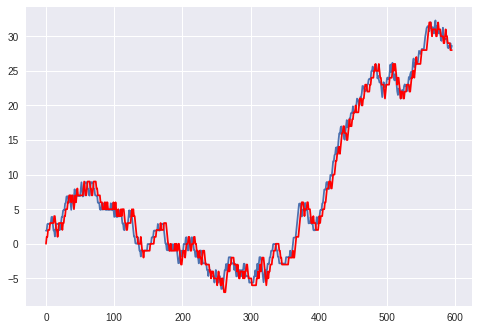

In [0]:
plt.plot(trainPredict)
plt.plot(x_val[:596], 'r')

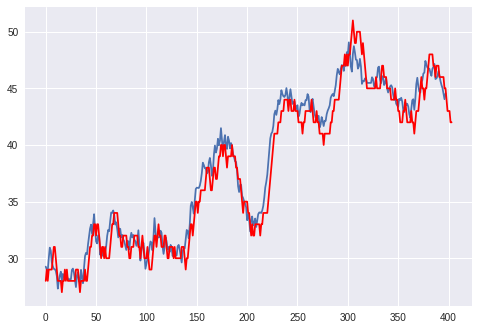

In [0]:
plt.plot(testPredict)
plt.plot(x_val[596:], 'r')

## Lorenz System

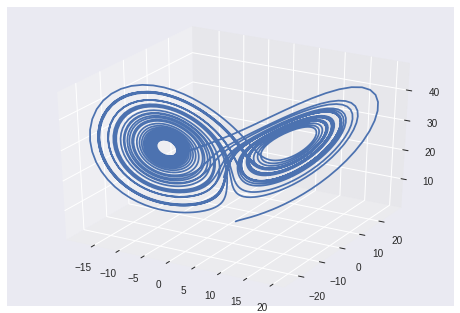

In [0]:
# Source: https://en.wikipedia.org/wiki/Lorenz_system

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

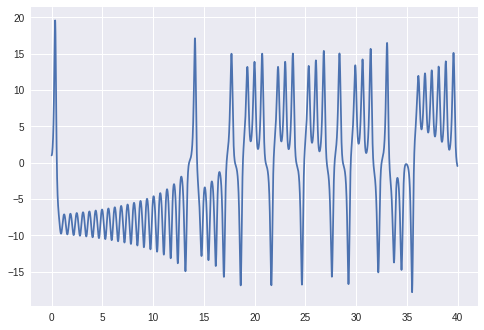

In [0]:
plt.plot(t, states[:,0])

In [0]:
import numpy as np
from random import uniform
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

x_val = states[:,0]
x_val = x_val.reshape(-1, 1)


# Scale the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_val)
x_train_scaled=scaler.transform(x_val)


print(x_train_scaled.shape)

# Create a window of data
lb=5
dataX, dataY = [], []
for i in range(len(x_train_scaled)-lb-1):
		  a = x_train_scaled[i:(i+lb), 0]
		  dataX.append(a)
		  dataY.append(x_train_scaled[i + lb, 0])
x_train_scaled, y_train_scaled = np.array(dataX), np.array(dataY)


# Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(x_train_scaled, y_train_scaled, train_size=0.6, shuffle = False)



# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4000, 1)
(2396, 5, 1)
(2396,)
(1598, 5, 1)
(1598,)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
print(X_train[1])

[[0.29199988]
 [0.29654947]
 [0.30387596]
 [0.31387207]
 [0.32650718]]


In [0]:
print(Y_train[1])

0.3418182418294377


In [0]:
model_l = Sequential()
model_l.add(LSTM(64, input_shape=(lb,1), return_sequences=False))
model_l.add(Dense(1))

model_l.compile(optimizer='adam', loss='mse', metrics=['mse']) # also try mae (mean aboslute error)

model_l.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_l = model_l.fit(X_train, Y_train, epochs=25, batch_size=1, verbose=1, validation_split=0.2)

Train on 1916 samples, validate on 480 samples
Epoch 1/25
1916/1916 [==============================] - 10s 5ms/step - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 2/25
1916/1916 [==============================] - 9s 5ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 3/25
1916/1916 [==============================] - 9s 5ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/25
1916/1916 [==============================] - 9s 5ms/step - loss: 6.4715e-04 - mean_squared_error: 6.4715e-04 - val_loss: 1.9514e-04 - val_mean_squared_error: 1.9514e-04
Epoch 5/25
1916/1916 [==============================] - 9s 5ms/step - loss: 4.2307e-04 - mean_squared_error: 4.2307e-04 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6/25
1916/1916 [==============================] - 9s 5ms/step - loss: 2.1174e-04 - mean_squared_error:

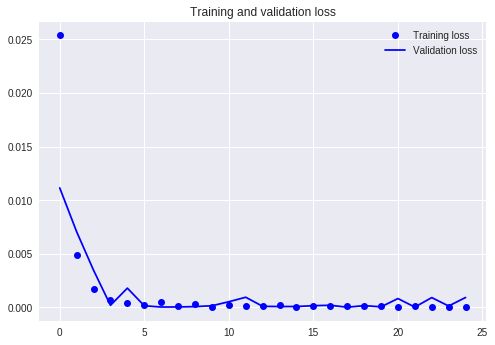

In [0]:
acc = history_l.history['mean_squared_error']
val_acc = history_l.history['val_mean_squared_error']
loss = history_l.history['loss']
val_loss = history_l.history['val_loss']

epochs = range(len(acc))



plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model_l.predict(X_train)
testPredict = model_l.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([Y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([Y_test])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.14 RMSE
Test Score: 0.21 RMSE


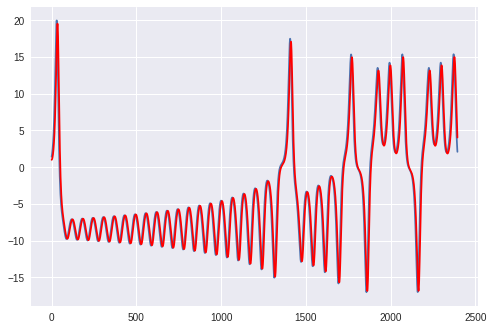

In [0]:
plt.plot(trainPredict)
plt.plot(x_val[:2396], 'r')

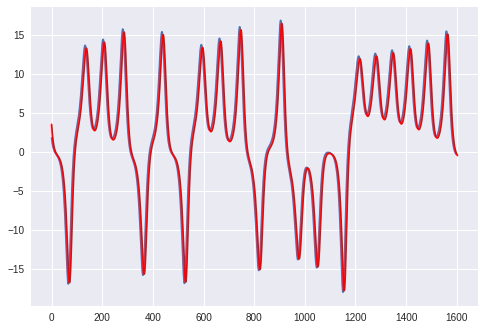

In [0]:
plt.plot(testPredict)
plt.plot(x_val[2396:], 'r')

## Lorentz Force Law

In [0]:
import numpy as np
from random import uniform
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)

def load_data_Lorentz(N, n, tf):
    ti = 0.  # Inital time
    tf = tf  # Final time
    N =  N  # Time steps
    n = n  # Number of particle systems
    dt = (tf - ti) / N
    t = np.arange(0, 100, dt)
    q = 1.69 * (10 ^ -19)  # Electron charge
    m = 9.109 * (10 ^ -31)  # Electron mass

    # Three dimensional motion
    data = []
    x = np.zeros((n, N, 3))  # Position
    v = np.zeros((n, N, 3))  # Velocity
    a = np.zeros((n, N, 3))  # Acceleration
    B = np.zeros((n, 3))  # Magnetic field

    # Initialization
    for i in range(n):
        x[i][0] = [uniform(-10, 10), uniform(-10, 10), uniform(-10, 10)]
        v[i][0] = [uniform(-10, 10), uniform(-10, 10), uniform(-10, 10)]
        a[i][0] = [uniform(-10, 10), uniform(-10, 10), uniform(-10, 10)]
        B[i] = [uniform(-10, 10), uniform(-10, 10), uniform(-10, 10)]
        data.append([*x[i][0], *v[i][0], *a[i][0]])

        for j in range(0, N-1):
            a[i][j+1] = (q / m) * np.cross(v[i][j], B[i])
            v[i][j+1] = v[i][j] + a[i][j] * dt
            x[i][j+1] = x[i][j] + (v[i][j] * dt) + (0.5 * a[i][j] * (dt ** 2))

            data.append([*x[i][j+1], *v[i][j+1], *a[i][j+1]])
            
    data = np.asarray(data)
    data = np.reshape(data, N*n*9)
    
    data = np.reshape(data, (N, 9))
        
    
    
    return t, data 

In [0]:
tf = 10.  # Final time
N =  1000  # Time steps
n = 1  # Number of particle systems


t, dataset = load_data_Lorentz(N, n, tf)

x_val = dataset[:,0]
x_val = x_val.reshape(-1, 1)


# Scale the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_val)
x_train_scaled=scaler.transform(x_val)



print(x_train_scaled.shape)


lb=5
dataX, dataY = [], []
for i in range(len(x_train_scaled)-lb-1):
		  a = x_train_scaled[i:(i+lb), 0]
		  dataX.append(a)
		  dataY.append(x_train_scaled[i + lb, 0])
x_train_scaled, y_train_scaled = np.array(dataX), np.array(dataY)

# Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(x_train_scaled, y_train_scaled, train_size=0.6, shuffle = False)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1000, 1)
(596, 5, 1)
(596,)
(398, 5, 1)
(398,)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
model = Sequential()
model.add(LSTM(64, input_shape=(lb,1))) 
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse']) # also try mae (mean aboslute error)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=1, validation_split=0.2)

Train on 476 samples, validate on 120 samples
Epoch 1/50
476/476 [==============================] - 3s 7ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 2/50
476/476 [==============================] - 2s 5ms/step - loss: 2.2353e-04 - mean_squared_error: 2.2353e-04 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 3/50
476/476 [==============================] - 2s 5ms/step - loss: 3.2601e-04 - mean_squared_error: 3.2601e-04 - val_loss: 8.7149e-04 - val_mean_squared_error: 8.7149e-04
Epoch 4/50
476/476 [==============================] - 2s 5ms/step - loss: 2.5372e-04 - mean_squared_error: 2.5372e-04 - val_loss: 5.5976e-04 - val_mean_squared_error: 5.5976e-04
Epoch 5/50
476/476 [==============================] - 2s 5ms/step - loss: 3.1038e-04 - mean_squared_error: 3.1038e-04 - val_loss: 7.2386e-04 - val_mean_squared_error: 7.2386e-04
Epoch 6/50
476/476 [==============================] - 2s 5ms/step - loss: 1.9380e-04 - m

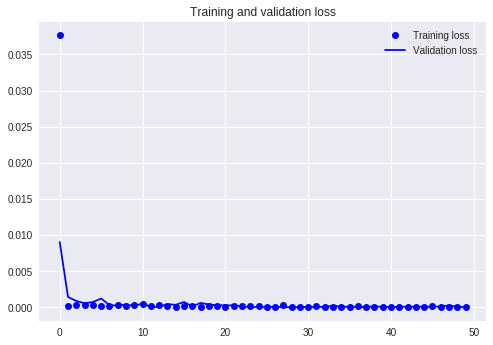

In [0]:
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))



plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([Y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([Y_test])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 0.93 RMSE
Test Score: 1.34 RMSE


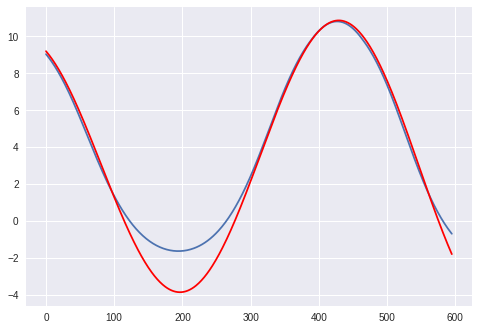

In [0]:
plt.plot(trainPredict)
plt.plot(x_val[:596], 'r')

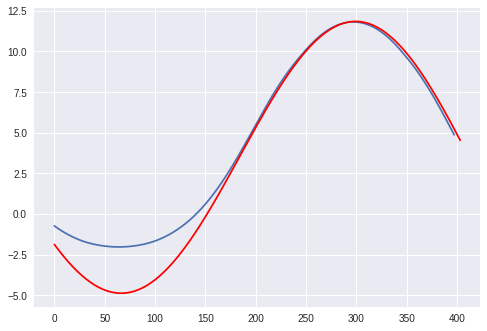

In [0]:
plt.plot(testPredict)
plt.plot(x_val[596:], 'r')

## Trying out KNN with the Lorentz force law data

In [0]:
from sklearn import neighbors

tf = 10.  # Final time
N =  1000  # Time steps
n = 1  # Number of particle systems


t, dataset = load_data_Lorentz(N, n, tf)

x_val = dataset[:,0]
x_val = x_val.reshape(-1, 1)


# Scale the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_val)
x_train_scaled=scaler.transform(x_val)



lb=1
dataX, dataY = [], []
for i in range(len(x_train_scaled)-lb-1):
		  a = x_train_scaled[i:(i+lb), 0]
		  dataX.append(a)
		  dataY.append(x_train_scaled[i + lb, 0])
x_train_scaled, y_train_scaled = np.array(dataX), np.array(dataY)

# Split data into test and train
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_train_scaled, y_train_scaled, train_size=0.6, shuffle = False)


neigh = neighbors.KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train1, Y_train1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [0]:
pred=neigh.predict(X_test1)

pred = scaler.inverse_transform(pred)

print(pred)

[ 2.67565165  2.69041225  2.70411784  2.74111359  2.76499598  2.78769288
  2.81691864  2.84792942  2.88071379  2.91525963  2.95155416  2.98958388
  3.02933465  3.07079165  3.1139394   3.15876178  3.20524201  3.25336268
  3.30310574  3.35445255  3.40738382  3.46187966  3.51791961  3.57548258
  3.63454694  3.69509047  3.75709039  3.82052337  3.88536556  3.95159254
  4.0191794   4.08810071  4.15833055  4.2298425   4.30260967  4.37660469
  4.45179976  4.52816662  4.60567658  4.68430054  4.76400898  4.844772
  4.9265593   5.00934022  5.09308375  5.17775851  5.35010556  5.49898356
  5.61459255  5.69652182  5.72543151  5.78856793  5.88090573  5.95460587
  6.04018514  6.12203572  6.22653023  6.30792796  6.39365761  6.50231841
  6.57765171  6.67566933  6.75240512  6.84210575  6.93370724  7.0152335
  7.12850201  7.19602017  7.31405797  7.38389897  7.50632369  7.57827808
  7.65089087  7.74923154  7.85297334  7.91272191  7.99111528  8.10998476
  8.18917256  8.27972982  8.36002393  8.45633918  8.53

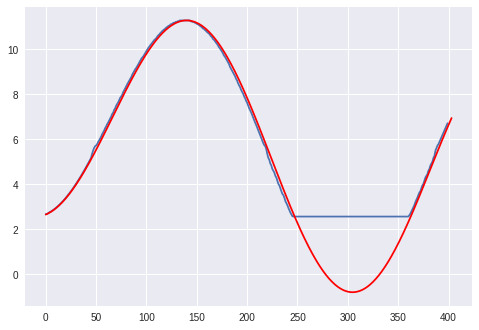

In [0]:
plt.plot(pred)
plt.plot(x_val[596:], 'r')